<a href="https://colab.research.google.com/github/avneesh-nolkha/EVA5/blob/master/Session12/EVA5_Assignment12B_unmodular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ImageYolo (1).jpg to ImageYolo (1).jpg
Saving ImageYolo (2).jpg to ImageYolo (2).jpg
Saving ImageYolo (2).png to ImageYolo (2).png
Saving ImageYolo (3).jpg to ImageYolo (3).jpg
Saving ImageYolo (3).png to ImageYolo (3).png
Saving ImageYolo (4).jpg to ImageYolo (4).jpg
Saving ImageYolo (4).png to ImageYolo (4).png
Saving ImageYolo (5).jpg to ImageYolo (5).jpg
Saving ImageYolo (6).jpg to ImageYolo (6).jpg
Saving ImageYolo (7).jpg to ImageYolo (7).jpg
Saving ImageYolo (8).jpg to ImageYolo (8).jpg
Saving ImageYolo (9).jpg to ImageYolo (9).jpg
Saving ImageYolo (10).jpg to ImageYolo (10).jpg
Saving ImageYolo (11).jpg to ImageYolo (11).jpg
Saving ImageYolo (12).jpg to ImageYolo (12).jpg
Saving ImageYolo (13).jpg to ImageYolo (13).jpg
Saving ImageYolo (14).jpg to ImageYolo (14).jpg
Saving ImageYolo (15).jpg to ImageYolo (15).jpg
Saving ImageYolo (16).jpg to ImageYolo (16).jpg
Saving ImageYolo (17).jpg to ImageYolo (17).jpg
Saving ImageYolo (18).jpg to ImageYolo (18).jpg
Saving ImageYolo

In [62]:
import json
from PIL import Image

image_folder = "./"
ann_file = "./via_project_17Oct2020_14h40m.json"

ann_json = {}
with open(ann_file) as f:
	ann_json = json.load(f)

annotated = ann_json['_via_img_metadata']

#centroids = [] # {"class": name_of_class, "centroid": (x, y)}
centroids = []
for key, values in annotated.items():
  filename = values["filename"]
  filepath = image_folder + filename
  # Get height and width of image
  im = Image.open(filepath)
  im_width, im_height = im.size
  im.close()
  # Loop through all the regions, calculate the centroid and then scale it
  # Each region has the top-left (x, y) coordinates, plus the height and width of bounding box
  for region in values["regions"]:
    #class_name = region["region_attributes"]["Class"]
    x = region["shape_attributes"]["x"]
    y = region["shape_attributes"]["y"]
    width = region["shape_attributes"]["width"]
    height = region["shape_attributes"]["height"]
    print("Filename=", filename, ", x=", x, ", y=", y, ", width=", width, ", height=", height)
    centroid_x = x + width // 2
    centroid_y = y + height // 2
    scaled_x = centroid_x / im_width
    scaled_y = centroid_y / im_height
    print("Centroid_x=", centroid_x, ", centroid_y=", centroid_y, ", scaled_x=", scaled_x, ", scaled_y=", scaled_y)
    datapoint = [scaled_x, scaled_y]
    centroids.append(datapoint)

Filename= ImageYolo (1).jpg , x= 55 , y= 7 , width= 41 , height= 26
Centroid_x= 75 , centroid_y= 20 , scaled_x= 0.12096774193548387 , scaled_y= 0.06666666666666667
Filename= ImageYolo (1).jpg , x= 24 , y= 51 , width= 84 , height= 104
Centroid_x= 66 , centroid_y= 103 , scaled_x= 0.1064516129032258 , scaled_y= 0.3433333333333333
Filename= ImageYolo (1).jpg , x= 48 , y= 247 , width= 64 , height= 28
Centroid_x= 80 , centroid_y= 261 , scaled_x= 0.12903225806451613 , scaled_y= 0.87
Filename= ImageYolo (1).jpg , x= 152 , y= 23 , width= 50 , height= 33
Centroid_x= 177 , centroid_y= 39 , scaled_x= 0.2854838709677419 , scaled_y= 0.13
Filename= ImageYolo (1).jpg , x= 218 , y= 29 , width= 46 , height= 30
Centroid_x= 241 , centroid_y= 44 , scaled_x= 0.38870967741935486 , scaled_y= 0.14666666666666667
Filename= ImageYolo (1).jpg , x= 351 , y= 22 , width= 48 , height= 34
Centroid_x= 375 , centroid_y= 39 , scaled_x= 0.6048387096774194 , scaled_y= 0.13
Filename= ImageYolo (1).jpg , x= 448 , y= 28 , wid

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
#plt.scatter(X[:,0], X[:,1])
print (type(X), X.shape)

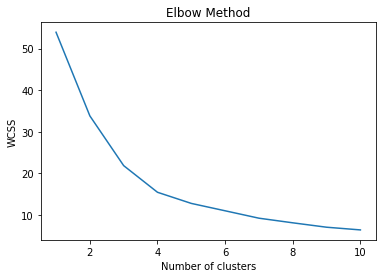

In [64]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(centroids)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

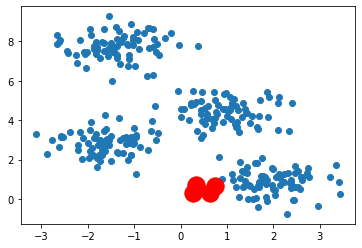

In [65]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(centroids)
x = [c[0] for c in X]
y = [c[1] for c in X]
plt.scatter(x, y)
#plt.scatter(centroids[:,0], centroids[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()